<a href="https://colab.research.google.com/github/Pawan20031/Women-Safety-System/blob/main/Clustering_(Spatial_Clustering_using_KMeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load your dataset (replace 'data.csv' with your file path)
data = pd.read_csv('data.csv')

In [ ]:
# Select features (latitude and longitude)
X = data[['Latitude', 'Longitude']]

In [ ]:
# Model/Algorithm
# Initialize KMeans clustering with a default number of clusters
model = KMeans(random_state=42)

In [ ]:
# Training the Model
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [ ]:
# Parameter Tuning
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

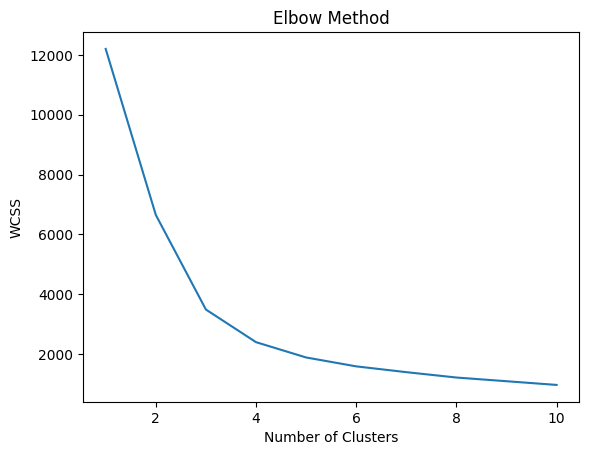

In [ ]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the Elbow Method, determine the optimal number of clusters and retrain the model
optimal_clusters = 3  # Adjust based on the Elbow Method graph
model = KMeans(n_clusters=optimal_clusters, random_state=42)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Prediction
# Predict cluster labels for each data point
cluster_labels = model.predict(X)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

# Calculate Within-Cluster Sum of Squares (WCSS)
wcss = model.inertia_

In [ ]:
print("Silhouette Score:", silhouette_avg)
print("Within-Cluster Sum of Squares (WCSS):", wcss)

Silhouette Score: 0.5017158871041542
Within-Cluster Sum of Squares (WCSS): 3488.3951762689303


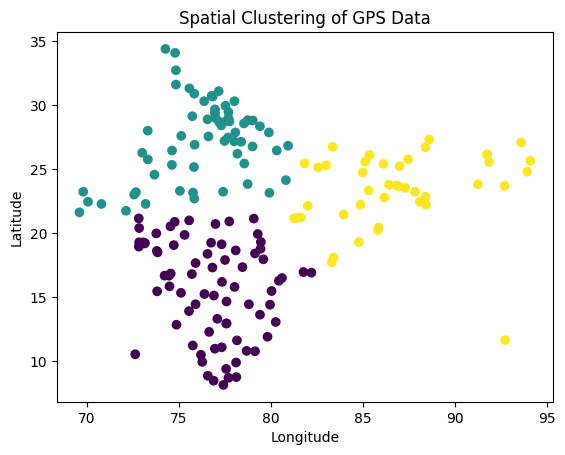

In [ ]:
# Result Visualization
# Visualize the clusters on a 2D plot
plt.scatter(X['Longitude'], X['Latitude'], c=cluster_labels, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of GPS Data')
plt.show()

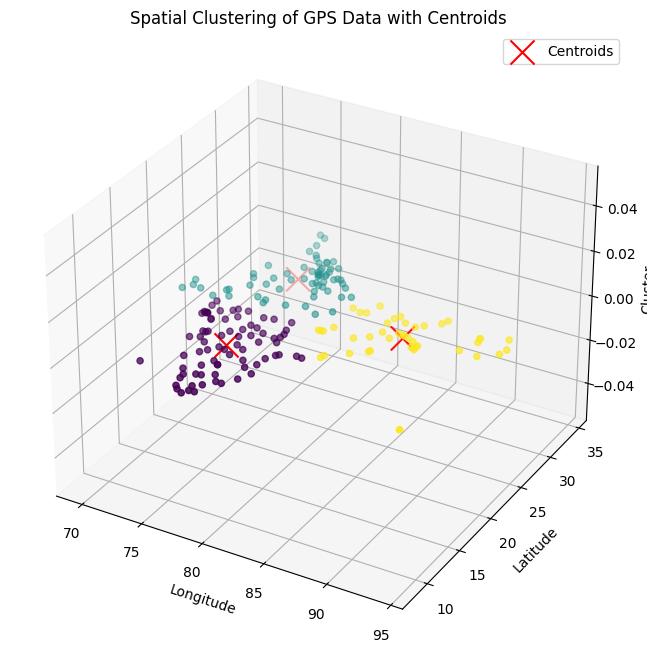

In [ ]:
# Optionally, visualize clusters in 3D with centroids
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Longitude'], X['Latitude'], c=cluster_labels, cmap='viridis')
centroids = model.cluster_centers_
ax.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red', s=300, label='Centroids')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Cluster')
ax.set_title('Spatial Clustering of GPS Data with Centroids')
plt.legend()
plt.show()